In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df["income"]=df['Taxable.Income']
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,68833
1,YES,Divorced,33700,134075,18,YES,33700
2,NO,Married,36925,160205,30,YES,36925
3,YES,Single,50190,193264,15,YES,50190
4,NO,Married,81002,27533,28,NO,81002
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,76340
596,YES,Divorced,69967,55369,2,YES,69967
597,NO,Divorced,47334,154058,0,YES,47334
598,YES,Married,98592,180083,17,NO,98592


In [5]:
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
df["income"].unique()

array(['Good', 'Risky'], dtype=object)

In [8]:
df.rename(columns={'Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)

In [9]:
df

,Undergrad,Marital_Status,Taxable.Income,City_Population,Work_Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
colnames=list(df.columns)

In [11]:
colnames

['Undergrad',
 'Marital_Status',
 'Taxable.Income',
 'City_Population',
 'Work_Experience',
 'Urban',
 'income']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Urban']=le.fit_transform(df['Urban'])
df

,Undergrad,Marital_Status,Taxable.Income,City_Population,Work_Experience,Urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [16]:
x=df.drop('income',axis=1)
y=df['income']

In [17]:
x

,Undergrad,Marital_Status,Taxable.Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [18]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: income, Length: 600, dtype: object

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
pd.crosstab(y_pred,y_test)

income,Good,Risky
row_0,,
Good,95,0
Risky,0,25


In [20]:
accuracy_score(y_pred , y_test)

1.0

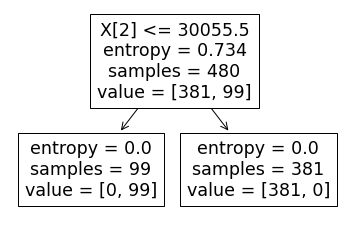

In [21]:
tree.plot_tree(model);

In [22]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [23]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
y_predict=model_gini.predict(x_test)

In [25]:
pd.crosstab(y_predict,y_test)

income,Good,Risky
row_0,,
Good,95,0
Risky,0,25


In [26]:
accuracy_score(y_predict , y_test)

1.0

In [27]:
from sklearn.model_selection import KFold , cross_val_score
kfold=KFold(n_splits=10)

In [28]:
from sklearn.ensemble import BaggingClassifier 
cart=DecisionTreeClassifier(criterion='entropy')
bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=7)
bag_results= cross_val_score(bagging_model,x,y,cv=kfold)
bag_results_1 = cross_val_score(bagging_model,x_train ,y_train,cv=kfold)

In [29]:
print(bag_results.mean())#full data

0.9983333333333334


In [30]:
print(bag_results_1.mean())#split data

0.9979166666666666
